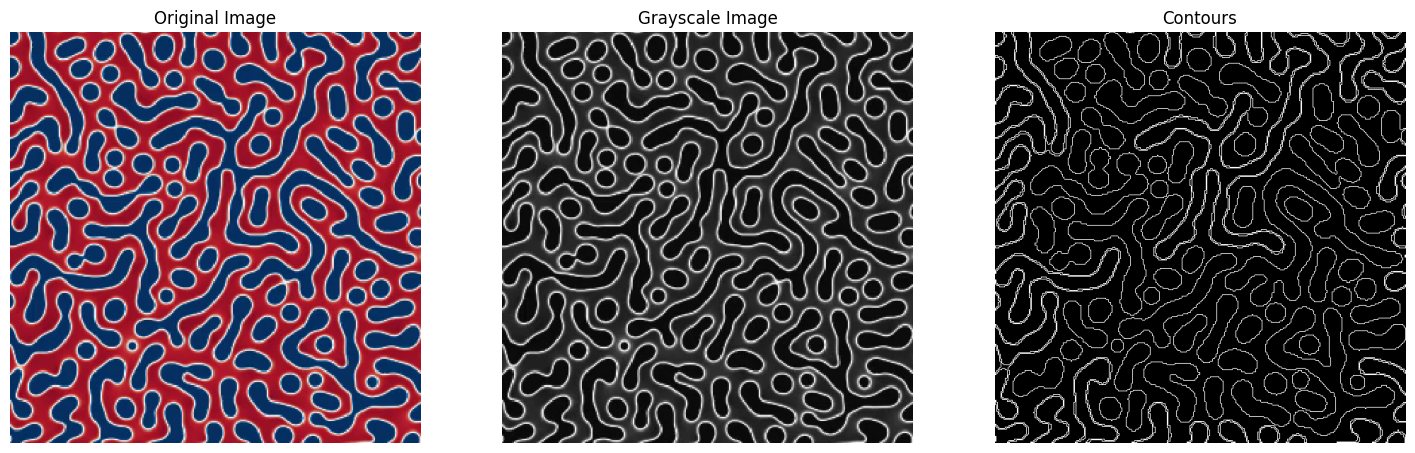

[7.0,
 80.5,
 77.5,
 154.5,
 136.0,
 175.5,
 220.0,
 77.0,
 292.0,
 794.5,
 389.0,
 1156.0,
 2451.0,
 1312.0,
 342.0,
 775.0,
 1457.5,
 3316.0,
 257.5,
 681.0,
 2107.5,
 1375.5,
 1639.5,
 258.0,
 646.5,
 615.5,
 1966.0,
 1041.5,
 1334.0,
 9359.5,
 625.0,
 1806.0,
 1563.0,
 923.5,
 2236.0,
 847.5,
 56.0,
 428.0,
 606.0,
 713.5,
 114.5,
 898.0,
 851.0,
 3.0,
 4790.0,
 1680.5,
 1006.5,
 875.5,
 1297.5,
 109.5,
 1221.0,
 1490.0,
 48.5,
 5234.5,
 948.5,
 799.0,
 877.0,
 1326.0,
 2053.5,
 544.5,
 37.0,
 11780.0,
 280.5,
 513.0,
 4774.5,
 1257.0,
 258.5,
 1375.5,
 2776.0,
 776.5,
 1367.0,
 1129.0,
 1928.5,
 1102.0,
 1536.0,
 799.0,
 283.5,
 1231.5,
 640.0,
 3392.0,
 1766.5,
 287.0,
 593.5,
 583.0,
 2133.5,
 787.5,
 100.0,
 884.0,
 157.0,
 810.5,
 1049.0,
 997.0,
 1925.5,
 63.0,
 454.5,
 159.5,
 4093.0,
 164.0,
 192.0,
 60.0,
 222.5,
 19.0,
 0.0,
 0.0,
 0.0,
 1259.0,
 53.5]

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Screenshot 2024-08-21 145437.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresholded = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to draw contours for visualization
contour_img = np.zeros_like(gray_image)

# Draw contours
cv2.drawContours(contour_img, contours, -1, (255, 0, 0), 1)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

axes[2].imshow(contour_img, cmap='gray')
axes[2].set_title('Contours')
axes[2].axis('off')

plt.show()

# Calculate particle sizes
particle_sizes = [cv2.contourArea(contour) for contour in contours]

particle_sizes

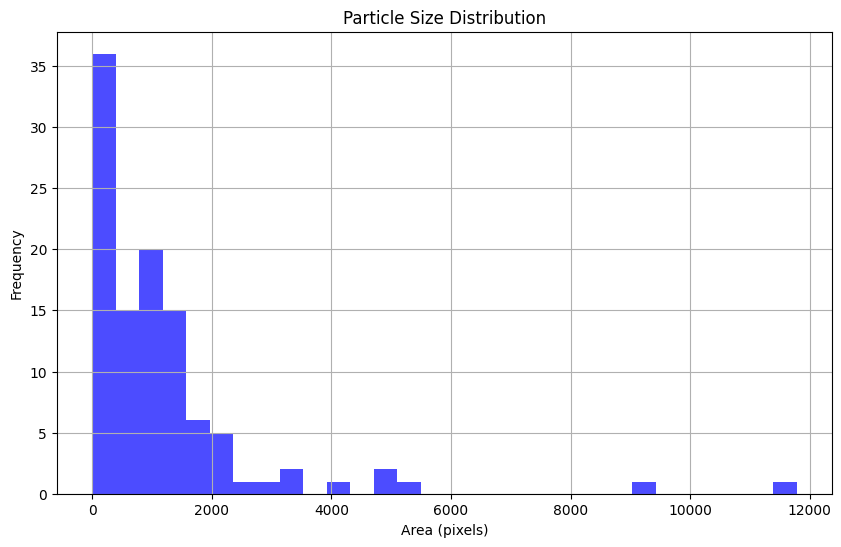

In [ ]:
# Plotting the particle size distribution as a histogram
plt.figure(figsize=(10, 6))
plt.hist(particle_sizes, bins=30, color='blue', alpha=0.7)
plt.title('Particle Size Distribution')
plt.xlabel('Area (pixels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

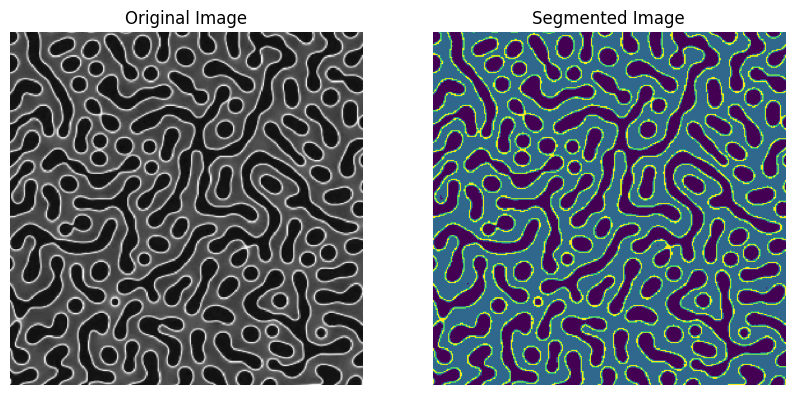

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Screenshot 2024-08-21 145437.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Reshape the image to be a list of pixels
pixels = image.reshape((-1, 1))

# Convert to float type
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Flatten the labels
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Display the results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image')
plt.axis('off')

plt.show()


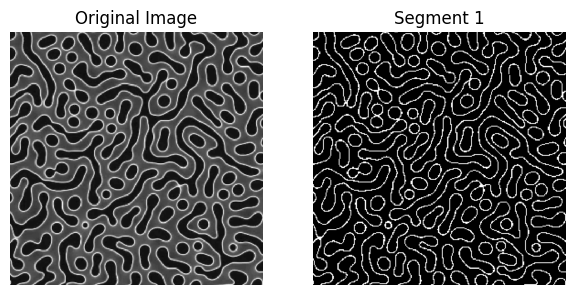

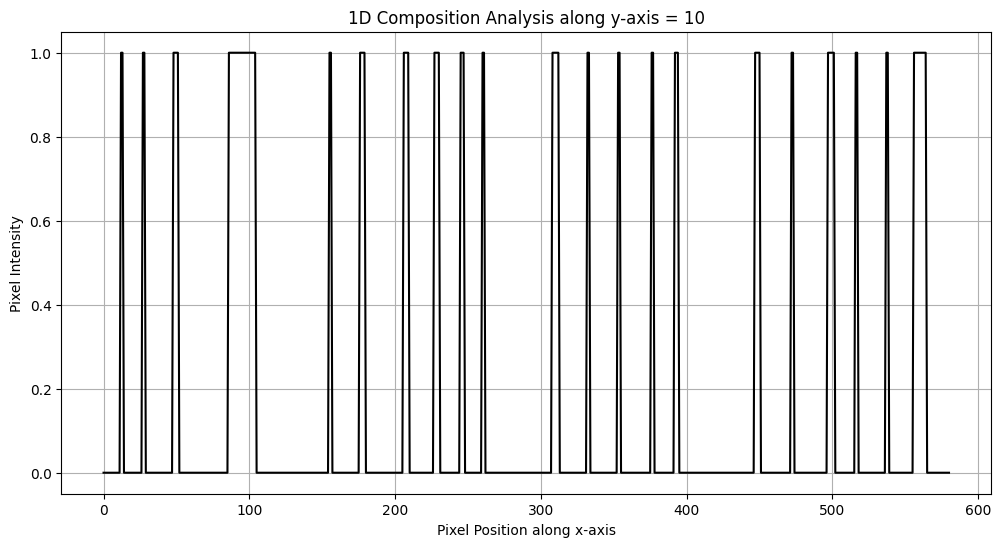

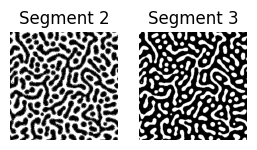

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Screenshot 2024-08-21 145437.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Reshape the image to be a list of pixels
pixels = image.reshape((-1, 1))

# Convert to float type
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Flatten the labels
labels = labels.flatten()

# Reshape data into the original image dimensions
segmented_image = centers[labels].reshape((image.shape))

# Create individual masks for each cluster
masks = []
for i in range(k):
    masks.append((labels == i).reshape(image.shape))

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, k+1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display each mask
for idx, mask in enumerate(masks, 1):
    plt.subplot(1, k+1, idx+1)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Segment {idx}')
    plt.axis('off')
    # Choose a fixed y-axis value
    if(idx==1):
      y_axis = 10  # Modify this value based on your specific needs

      # Extract the pixel values along the fixed y-axis
      pixel_values = mask[y_axis, :]

      # Plotting the 1D composition analysis
      plt.figure(figsize=(12, 6))
      plt.plot(pixel_values, color='black')  # Color can be changed as per preference
      plt.title(f'1D Composition Analysis along y-axis = {y_axis}')
      plt.xlabel('Pixel Position along x-axis')
      plt.ylabel('Pixel Intensity')
      plt.grid(True)
      plt.show()

plt.show()
